# Домашнє завдання

# Частина 1
* В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.


* На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [2]:
# !pip install wandb numpy pandas seaborn scikit-learn

In [3]:
import os
import math
import random

import numpy as np
import pandas as pd
# import cv2
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from tensorflow import keras

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.datasets import imdb
from keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import wandb
from wandb.keras import WandbMetricsLogger

2023-08-21 20:34:31.944569: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
lr = 0.001
n_epochs = 30
batch_size = 256

num_classes = 10

In [5]:
wandb.init(project="Hw10_1", config={"lr": lr, "n_epochs": n_epochs, "batch_size": batch_size})

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [7]:
# Перетворення масивів міток з (100000, 1) на (100000,)
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [8]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [9]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [10]:
# Оголошуємо вхідний тензор
input_layer = keras.Input(shape=(28, 28, 1))

# Згортковий шар 1
conv1 = keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')(input_layer)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)

# Згортковий шар 2
conv2 = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(pool1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)

# Згортковий шар 3
conv3 = keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(pool2)
pool3 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)

# Згортковий шар 4
conv4 = keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(pool3)
pool4 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv4)

# Плоский шар для розгортання в одновимірний вектор
flatten = keras.layers.Flatten()(pool4)

# # Перетворення вхідних даних в вектор
# flatten = keras.layers.Flatten()(input_layer)

#Повнозв'язний шар 1
dense1 = keras.layers.Dense(512, activation='relu')(flatten)

# Повнозв'язний шар 2
dense2 = keras.layers.Dense(256, activation='relu')(dense1)

# Вихідний шар з 10 нейронами і функцією активації softmax
output_layer = keras.layers.Dense(10, activation='softmax')(dense2)

# Створення моделі
model = keras.Model(inputs=input_layer, outputs=output_layer)

# Виведення інформації про модель
model.summary()

2023-08-21 20:35:25.348563: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:03:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-21 20:35:25.359811: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:03:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-21 20:35:25.360209: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:03:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-21 20:35:25.363508: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:03:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-21 20:35:25.363879: I tensorflow/compile

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856 

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
y_train_encoded = keras.utils.to_categorical(y_train, num_classes)
y_test_encoded = keras.utils.to_categorical(y_test, num_classes)

In [13]:
callback_early_stopping = EarlyStopping(
    monitor="val_accuracy",
    patience=2,
    verbose=1,
    mode="max",
)

callback_save = ModelCheckpoint(
    "best_Hw10_1.hdf5",
    monitor="val_loss",
    save_best_only=True,
)

In [14]:
history = model.fit(x_train,
          y_train_encoded,
          epochs=n_epochs,
          batch_size=batch_size,
          validation_data=(x_test, y_test_encoded),
          verbose=1,
          callbacks=[callback_early_stopping, WandbMetricsLogger(), callback_save])

Epoch 1/30


2023-08-21 20:35:44.115824: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-21 20:35:46.471080: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fda98022660 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-21 20:35:46.471203: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 3GB, Compute Capability 6.1
2023-08-21 20:35:46.529678: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-21 20:35:46.929453: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


235/235 [==============================] - 15s 25ms/step - loss: 0.6547 - accuracy: 0.7536 - val_loss: 0.4231 - val_accuracy: 0.8475
Epoch 2/30
  4/235 [..............................] - ETA: 4s - loss: 0.4434 - accuracy: 0.8389

/usr/local/lib/python3.8/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


235/235 [==============================] - 5s 20ms/step - loss: 0.3546 - accuracy: 0.8697 - val_loss: 0.3394 - val_accuracy: 0.8749
Epoch 3/30
235/235 [==============================] - 5s 20ms/step - loss: 0.2903 - accuracy: 0.8935 - val_loss: 0.3000 - val_accuracy: 0.8918
Epoch 4/30
235/235 [==============================] - 5s 20ms/step - loss: 0.2535 - accuracy: 0.9059 - val_loss: 0.2719 - val_accuracy: 0.9027
Epoch 5/30
235/235 [==============================] - 5s 21ms/step - loss: 0.2246 - accuracy: 0.9174 - val_loss: 0.2579 - val_accuracy: 0.9062
Epoch 6/30
235/235 [==============================] - 5s 20ms/step - loss: 0.2036 - accuracy: 0.9251 - val_loss: 0.2436 - val_accuracy: 0.9107
Epoch 7/30
235/235 [==============================] - 5s 20ms/step - loss: 0.1844 - accuracy: 0.9322 - val_loss: 0.2503 - val_accuracy: 0.9109
Epoch 8/30
235/235 [==============================] - 5s 20ms/step - loss: 0.1717 - accuracy: 0.9358 - val_loss: 0.2316 - val_accuracy: 0.9186
Epoch 9/30

In [15]:
wandb.finish()

epoch/accuracy,▁▅▆▆▇▇▇▇▇▇███
epoch/epoch,▁▂▂▃▃▄▅▅▆▆▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▄▃▃▃▂▂▂▂▂▁▁▁
epoch/val_accuracy,▁▄▅▆▆▇▇█████▇
epoch/val_loss,█▅▄▃▂▂▂▁▁▁▁▂▃
epoch/accuracy,0.96175
epoch/epoch,12
epoch/learning_rate,0.001
epoch/loss,0.10196
epoch/val_accuracy,0.9142


In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test_encoded)

313/313 [==============================] - 2s 6ms/step - loss: 0.2645 - accuracy: 0.9142


In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [18]:
predictions = model.predict(x_test)
predictions[0]

313/313 [==============================] - 1s 3ms/step


array([3.4799971e-06, 3.3929769e-06, 5.6076296e-06, 1.6211156e-06,
       3.6313843e-06, 4.1314663e-05, 9.2255607e-07, 6.9399510e-05,
       2.7283388e-06, 9.9986792e-01], dtype=float32)

In [19]:
predictions.shape

(10000, 10)

In [20]:
np.argmax(predictions[1])

2

In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[2]

'Pullover'

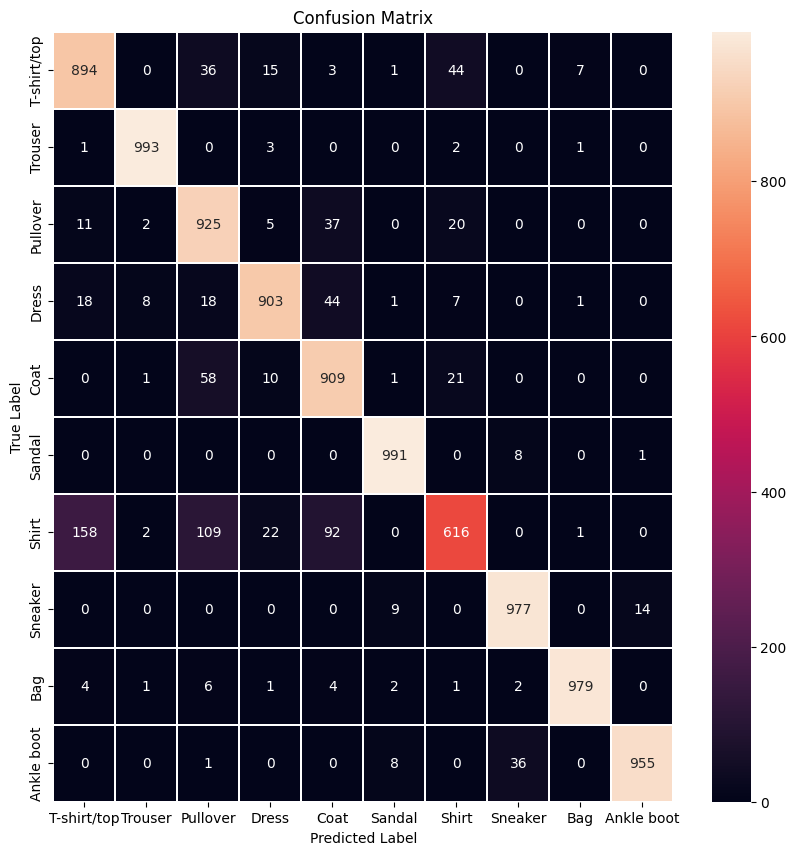

In [22]:
y_pred_classes = np.argmax(predictions, axis = 1)
y_test = y_test.reshape(-1,1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, linecolor="white", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
ax.xaxis.set_ticklabels(class_names); ax.yaxis.set_ticklabels(class_names);
plt.show()

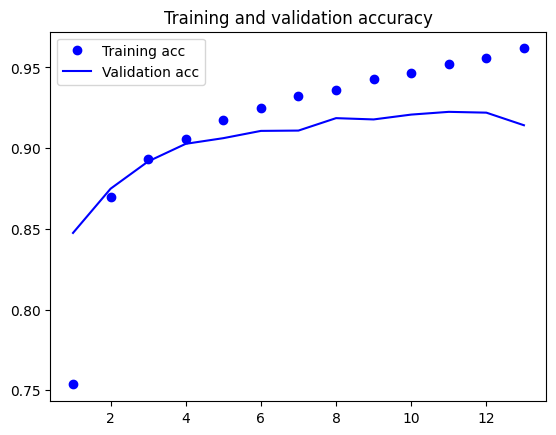

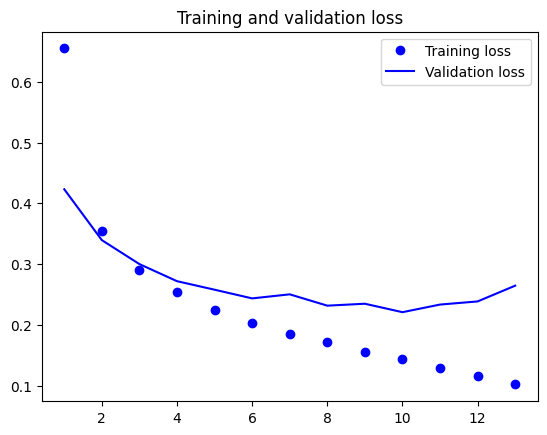

In [23]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.show()

# Висновок

*   Згорткові шари покращили точність val_accuracy з 0.88 на 0.92. Але модель є перенавченою, по тестам з різними метриками я досяг меншого перенавчання, але воно всеодно було присутнім.
*   Згорткові шари покращують навчання мережі. Для того щоб боротись з перенавчанням потрібно збільшити датасет як варіант додати трансформацій для зображень.

